### Identify drift units

In [12]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from scripts.anova_analysis.run_anova import load_data
import scipy
import argparse
import copy
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import itertools
from scipy.ndimage import gaussian_filter1d


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
subject = "BL"
units = pd.read_pickle(UNITS_PATH.format(sub=subject))
args = argparse.Namespace(
    **AnovaConfigs()._asdict()
)
args.conditions = ["BeliefConf", "BeliefPartition"]
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.window_size = 500
args.subject = subject
_, _, pref_res = io_utils.read_anova_res_all_time(args, "95th", "BeliefPref", read_shuffle=True)

In [14]:
n_timebins_sig = pref_res.groupby(["PseudoUnitID", "feat", "structure_level2"]).abs_time.nunique().reset_index(name="n_timebins")

Text(0, 0.5, 'num units')

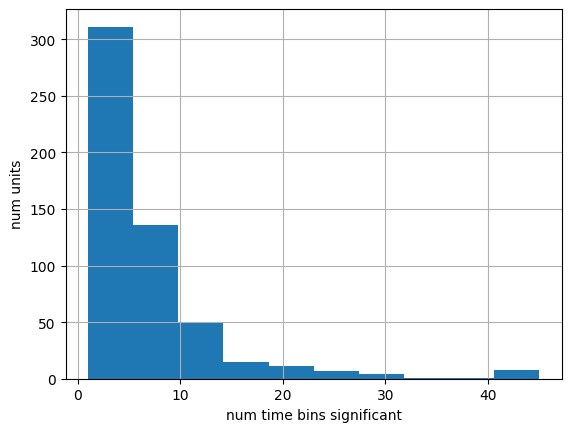

In [15]:
fig, ax = plt.subplots()
n_timebins_sig.n_timebins.hist(ax=ax)
ax.set_xlabel("num time bins significant")
ax.set_ylabel("num units")

In [16]:
n_timebins_sig

,PseudoUnitID,feat,structure_level2,n_timebins
0,2019012803,STAR,extrastriate_visual_areas_2-4 (V2-V4),7
1,2019012805,STAR,inferior_temporal_cortex (ITC),3
2,2019012806,STAR,medial_pallium (MPal),3
3,2019012807,STAR,inferior_parietal_lobule (IPL),5
4,2019012810,STAR,medial_pallium (MPal),2
...,...,...,...,...
539,2019090407,ESCHER,medial_pallium (MPal),4
540,2019090407,POLKADOT,medial_pallium (MPal),37
541,2019090407,TRIANGLE,medial_pallium (MPal),5
542,2019090408,ESCHER,medial_pallium (MPal),25


2019022800, CIRCLE, 30 timebins. Channel 104, unit: 1, basal_ganglia (BG)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


2019022813, STAR, 30 timebins. Channel 79, unit: 1, medial_pallium (MPal)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


2019052405, SQUARE, 30 timebins. Channel 73, unit: 1, medial_pallium (MPal)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


2019020701, CYAN, 29 timebins. Channel 101, unit: 2, basal_ganglia (BG)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


2019070910, STAR, 27 timebins. Channel 60, unit: 1, medial_pallium (MPal)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


2019071000, ESCHER, 26 timebins. Channel 101, unit: 1, medial_pallium (MPal)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


2019081405, ESCHER, 25 timebins. Channel 53, unit: 1, medial_pallium (MPal)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


2019090408, ESCHER, 25 timebins. Channel 99, unit: 1, medial_pallium (MPal)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


2019070207, SQUARE, 23 timebins. Channel 70, unit: 1, medial_pallium (MPal)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


2019060604, POLKADOT, 23 timebins. Channel 35, unit: 1, medial_pallium (MPal)


/tmp/ipykernel_985446/4092217014.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


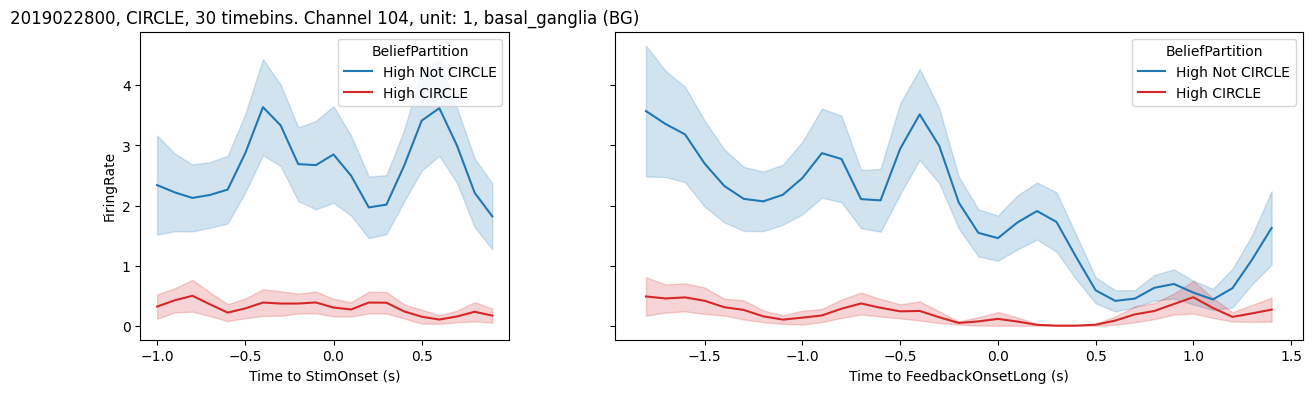

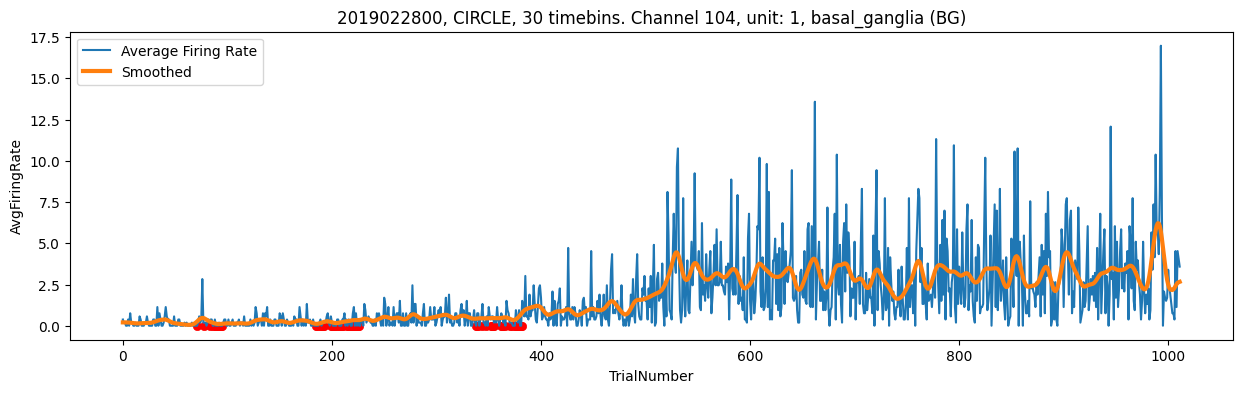

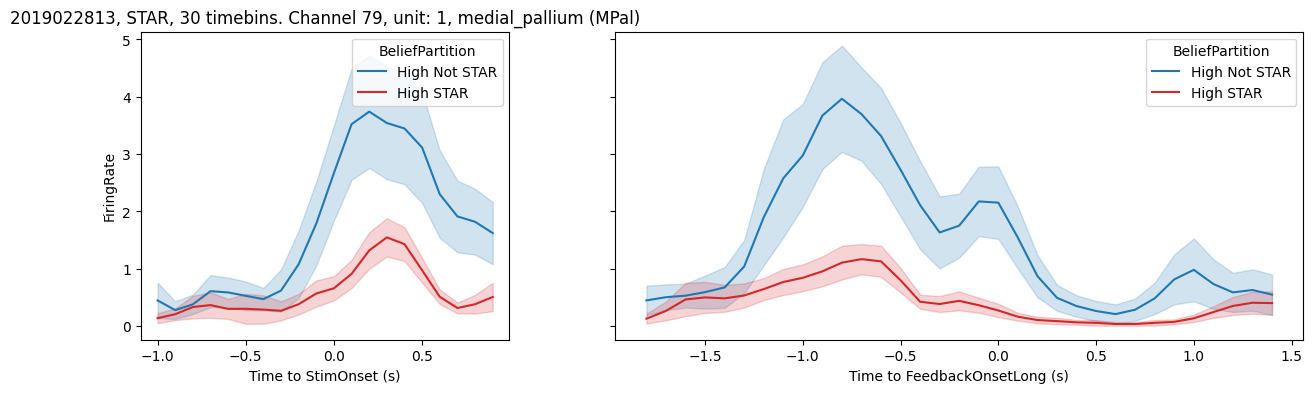

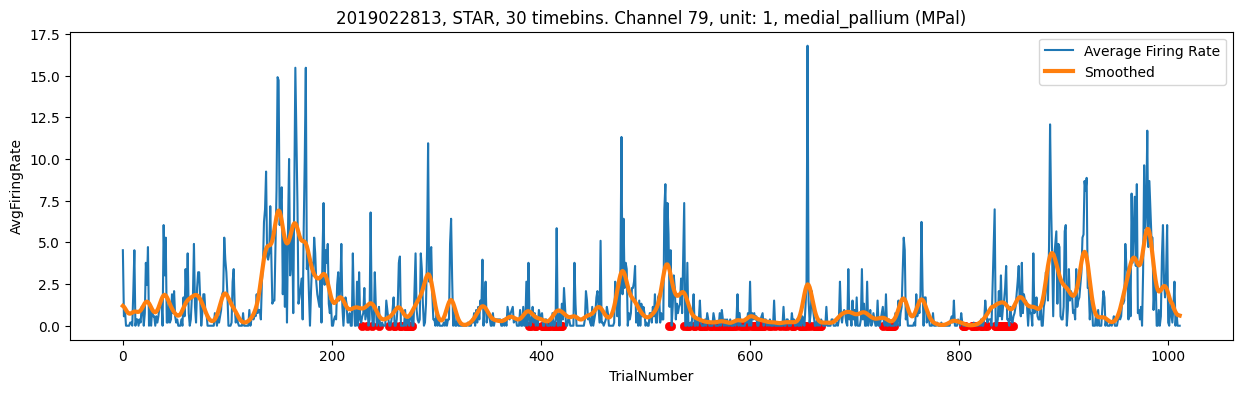

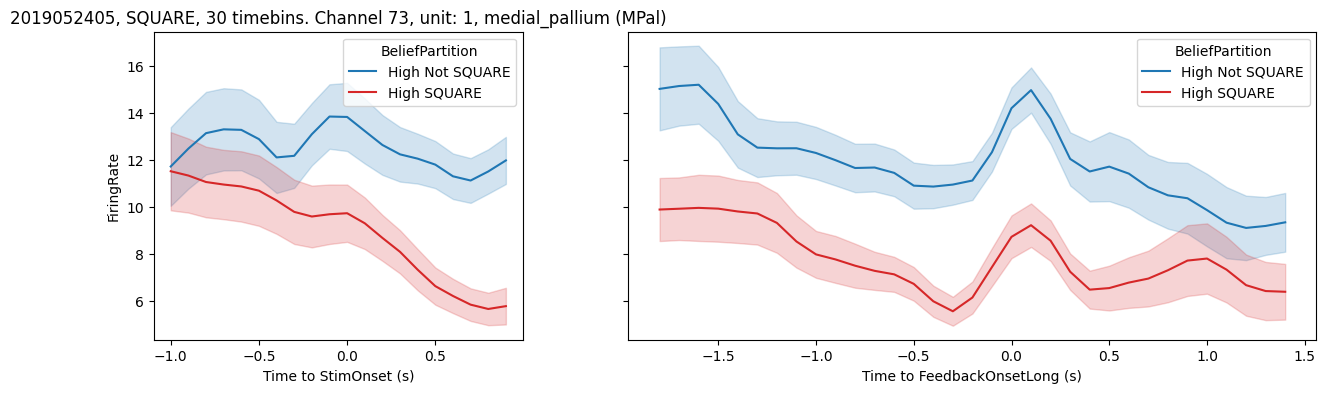

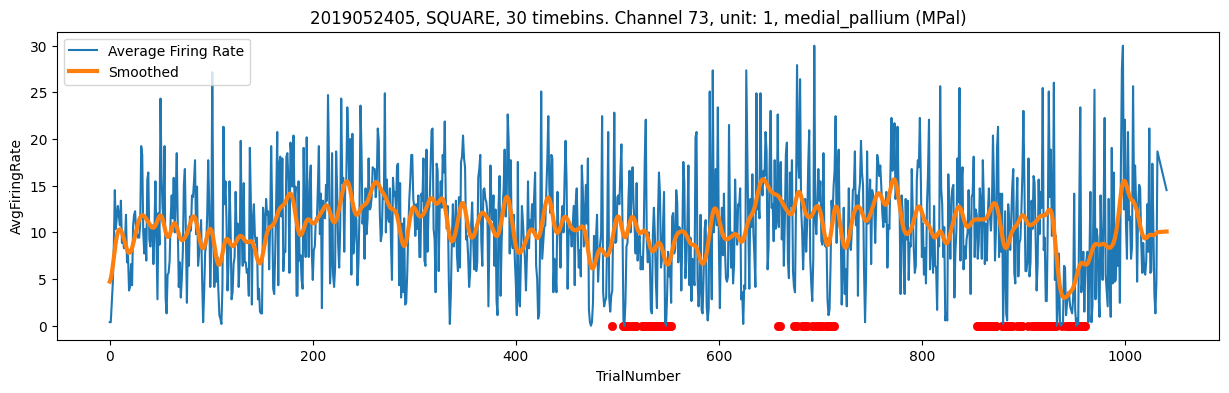

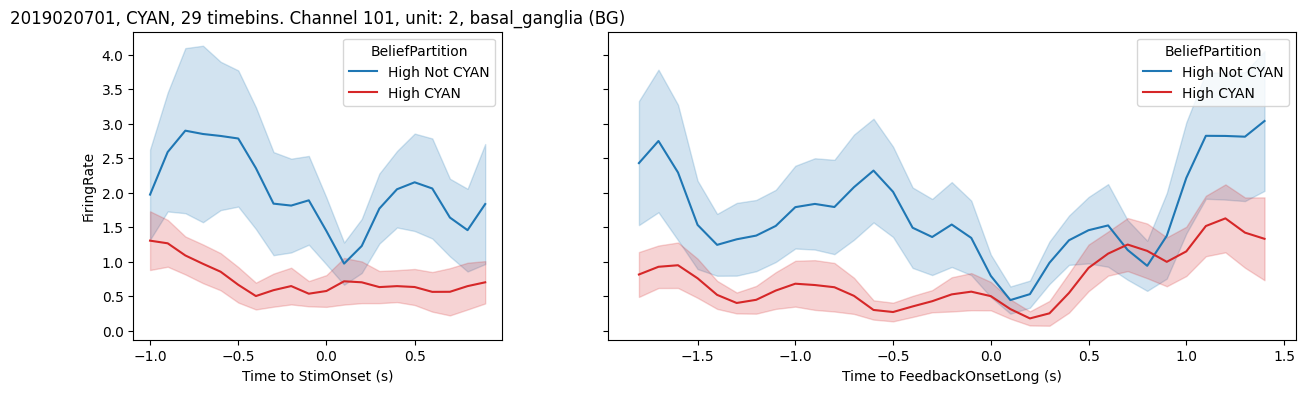

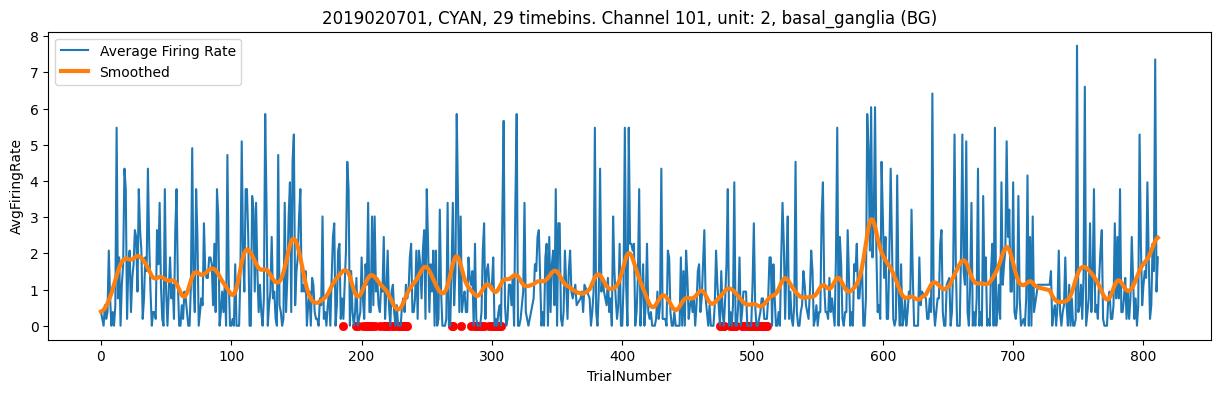

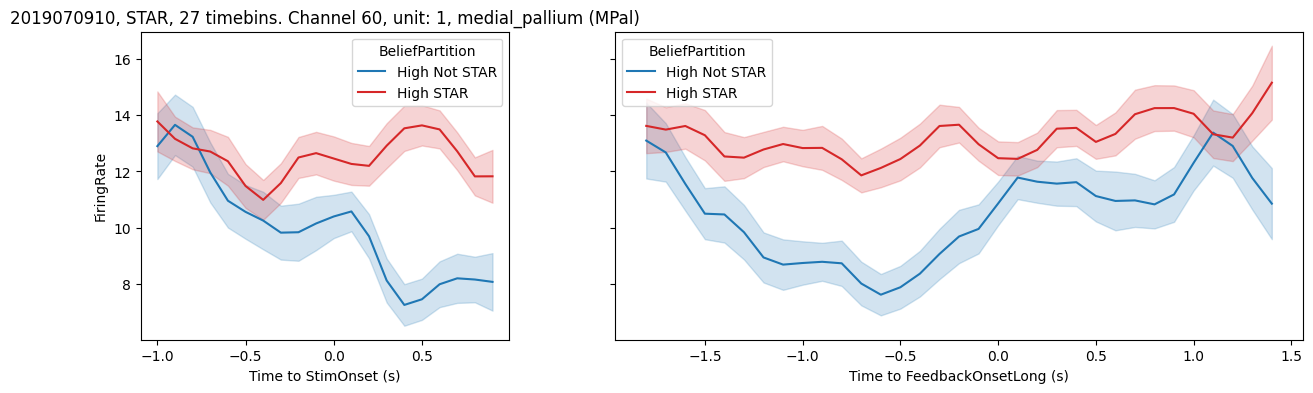

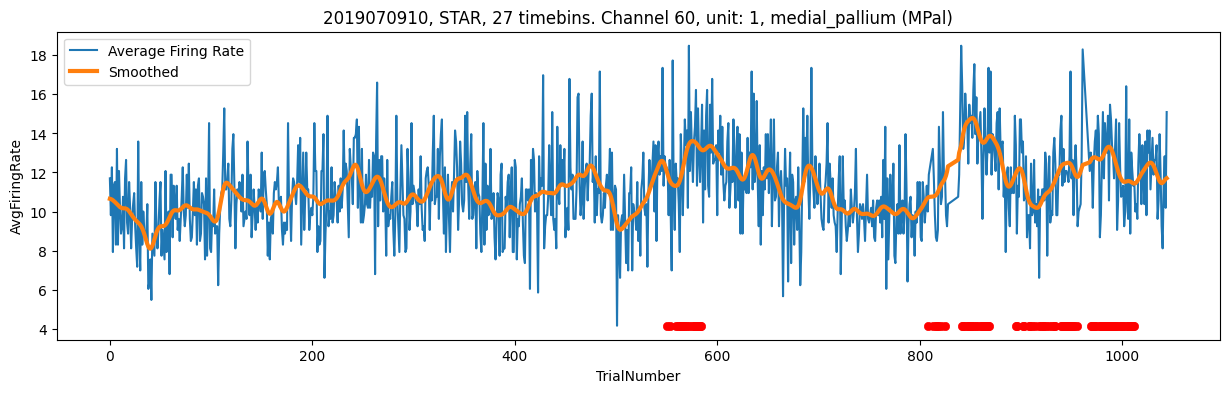

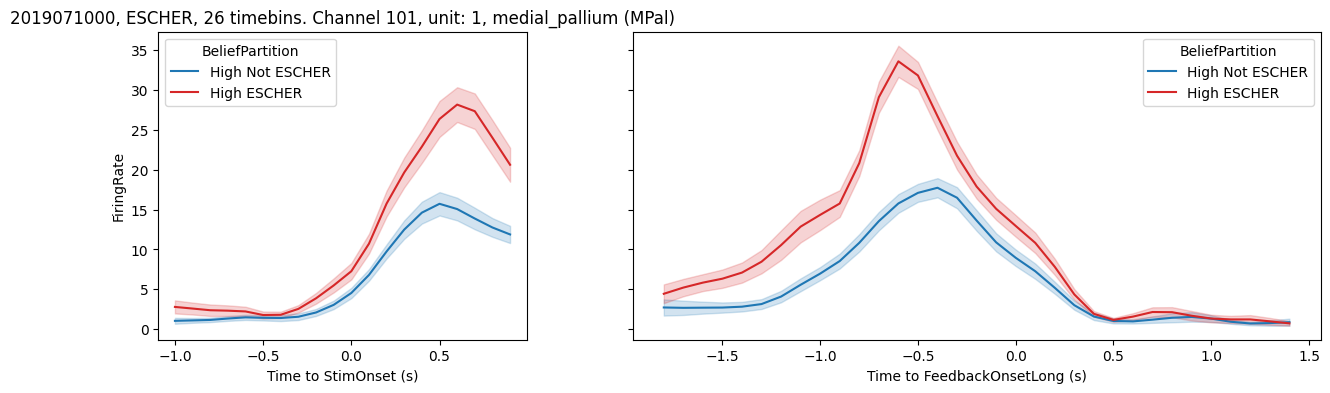

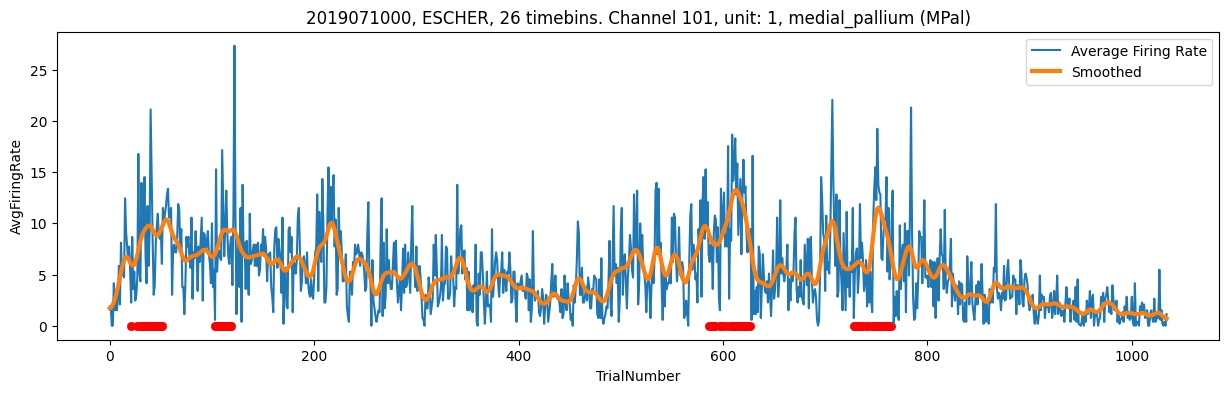

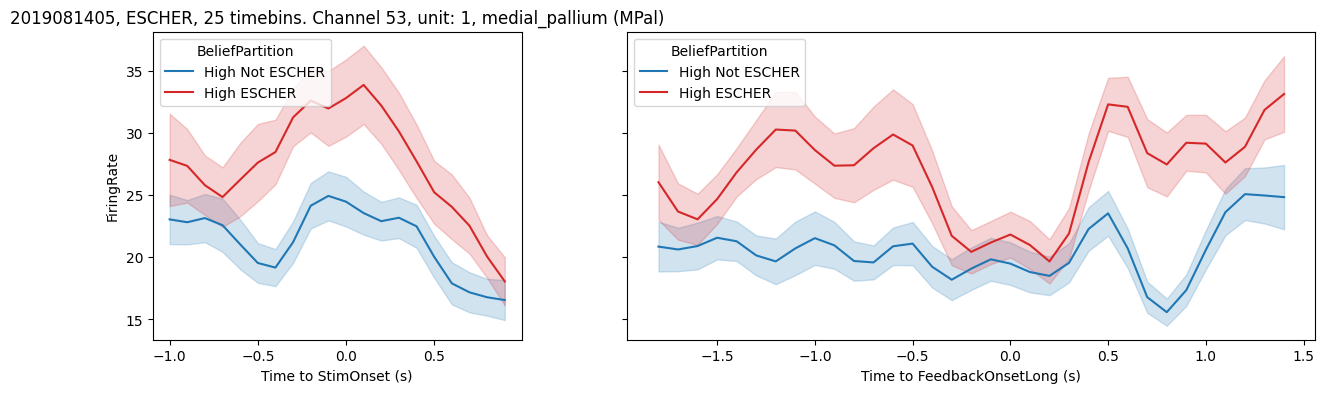

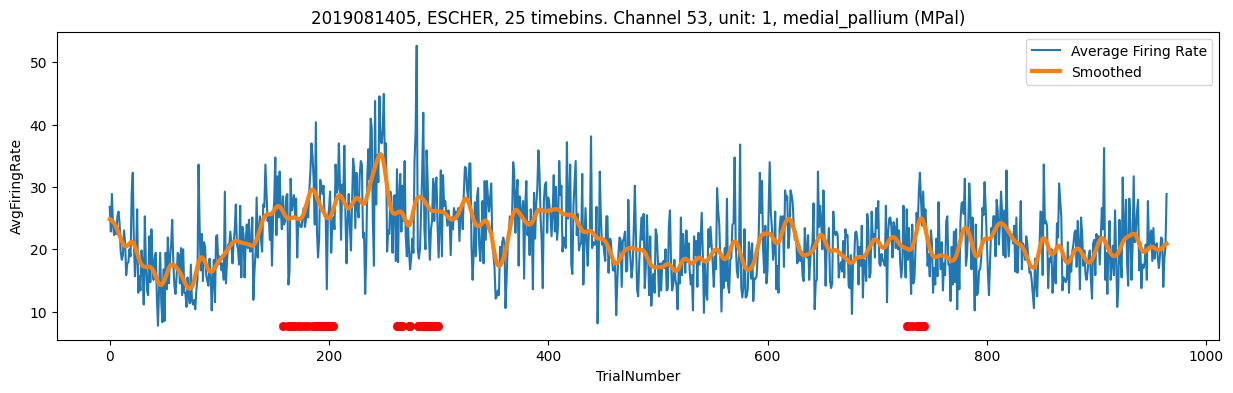

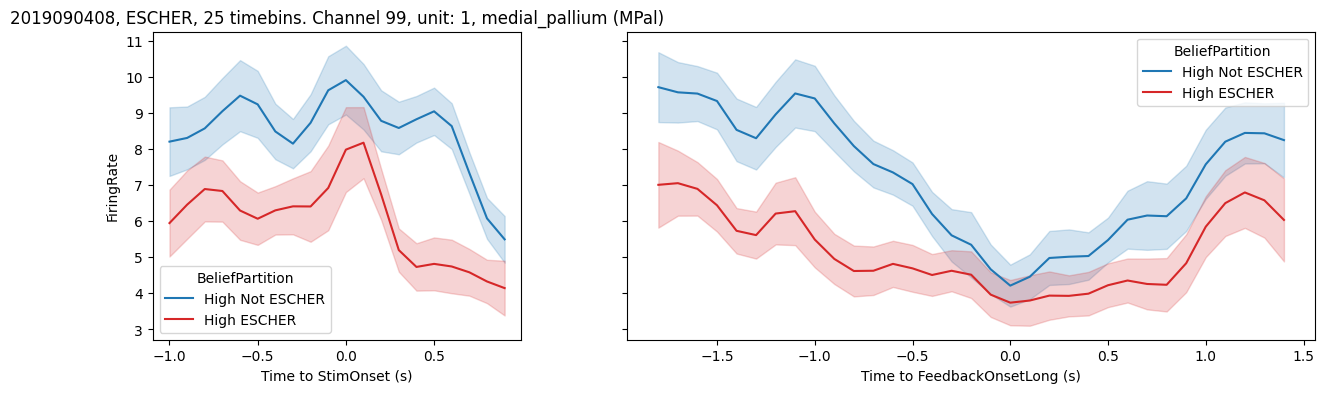

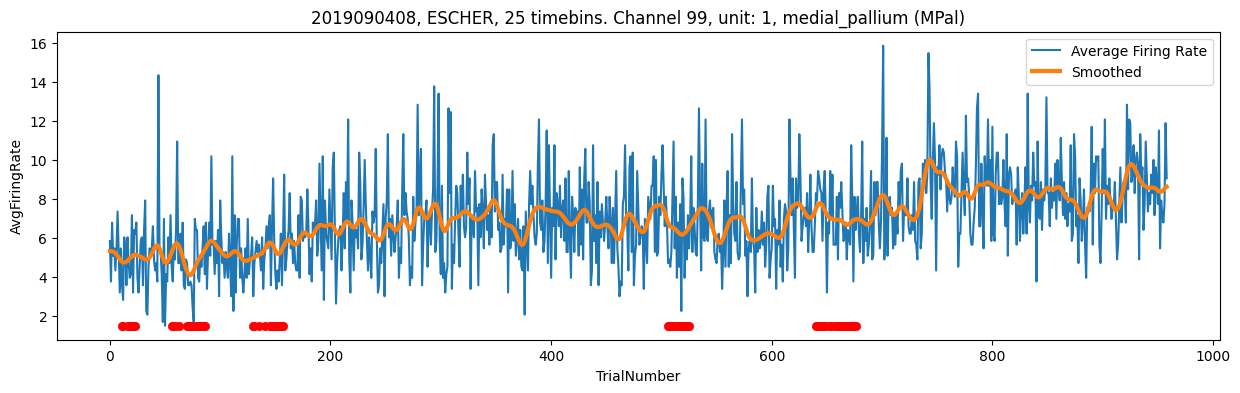

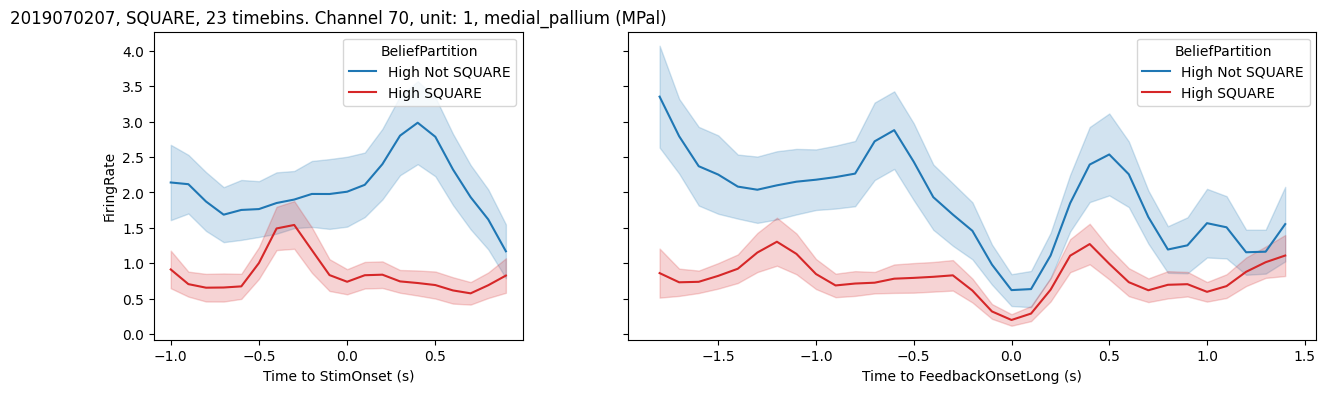

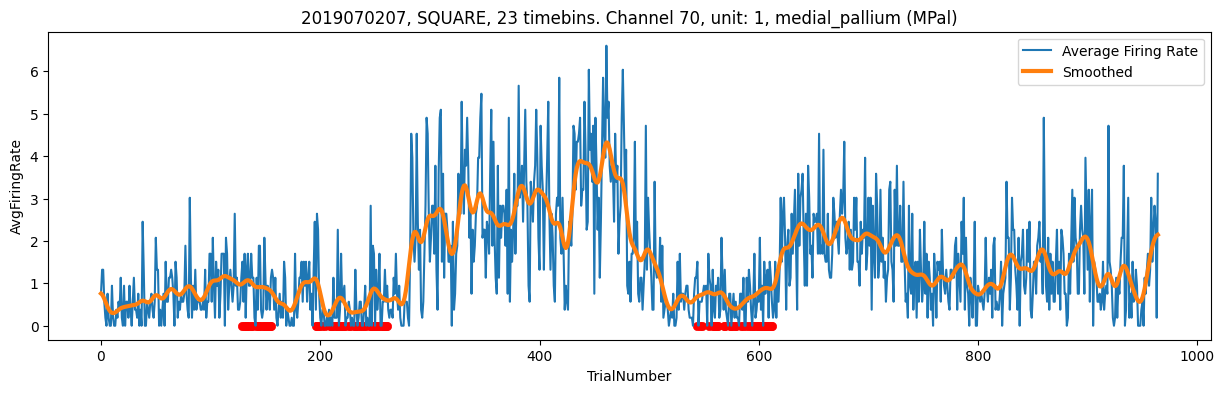

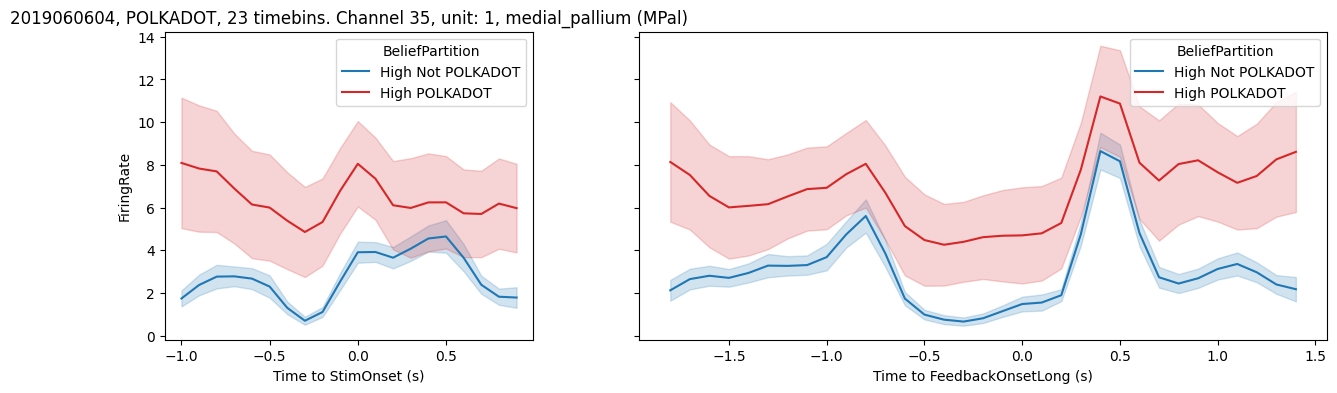

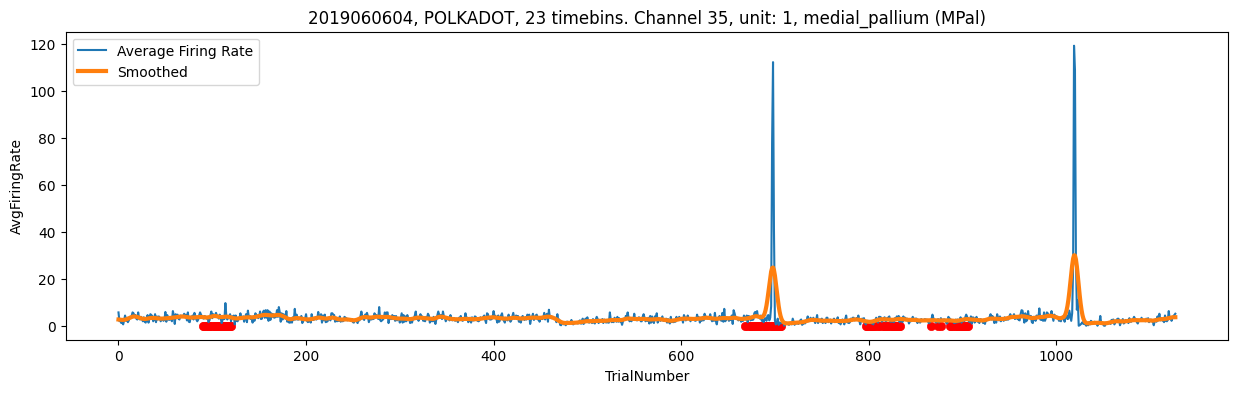

In [18]:
for i, row in n_timebins_sig.sort_values(by="n_timebins", ascending=False)[10:20].iterrows():
    fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True, width_ratios=(15, 28))
    session = int(row.PseudoUnitID / 100)
    args.feat = row.feat
    unit_info_row = units[units.PseudoUnitID == row.PseudoUnitID].iloc[0]
    title = f"{row.PseudoUnitID}, {row.feat}, {row.n_timebins} timebins. Channel {unit_info_row.Channel}, unit: {unit_info_row.Unit}, {row.structure_level2}"
    print(title)
    all_frs = []
    for event_idx, event in enumerate(["StimOnset", "FeedbackOnsetLong"]):
        args.trial_event = event
        args.trial_interval = get_trial_interval(event)
        beh, frs = load_data(session, args, return_merged=False)
        frs = frs[frs.PseudoUnitID == row.PseudoUnitID]
        all_frs.append(frs)

        sub_beh = beh[beh.BeliefPartition.isin([f"High {args.feat}", f"High Not {args.feat}"])]
        order = [f"High Not {args.feat}", f"High {args.feat}"]
        colors = ["tab:blue", "tab:red"]

        sns.lineplot(pd.merge(frs, sub_beh, on="TrialNumber"), x="Time", y="FiringRate", errorbar="se", hue="BeliefPartition", hue_order=order, palette=colors, ax=axs[event_idx])
        axs[event_idx].set_xlabel(f"Time to {args.trial_event} (s)")
    axs[0].set_title(title)

    fig, ax = plt.subplots(figsize=(15, 4))
    all_frs = pd.concat(all_frs)
    avg_frs = all_frs.groupby(["TrialNumber"]).FiringRate.mean().reset_index(name="AvgFiringRate")
    avg_frs["smoothed"] =gaussian_filter1d(avg_frs.AvgFiringRate, sigma=4)

    block_beh = beh[beh.CurrentRule == row.feat]
    sns.lineplot(avg_frs, x="TrialNumber", y="AvgFiringRate", ax=ax, label="Average Firing Rate")
    sns.lineplot(avg_frs, x="TrialNumber", y="smoothed", ax=ax, label="Smoothed", linewidth=3)


    block_beh["y"] = avg_frs.AvgFiringRate.min()
    sns.scatterplot(block_beh, x="TrialNumber", y="y", ax=ax, color="red", edgecolor=None)
    ax.set_title(title)
